### Extracting Jobs From Linkedin

In [ ]:
# Import Libraries
import time
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import requests
import os
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
# Driver path
driver_linkedin = webdriver.Chrome()
url='https://www.linkedin.com/jobs/search/?keywords=data%20analyst&location=Pakistan'
driver_linkedin.get(url)

In [ ]:
# Maximize Window
driver_linkedin.maximize_window()
# driver_linkedin.minimize_window()
# driver_linkedin.maximize_window()
driver_linkedin.switch_to.window(driver_linkedin.current_window_handle)
driver_linkedin.implicitly_wait(10)

In [ ]:
print('Links are being collected now.')
links = []
for page in range(1,4):
    # time.sleep(3)
    jobs_block = driver_linkedin.find_element(By.CLASS_NAME, 'jobs-search__results-list')
    jobs_list= jobs_block.find_elements(By.TAG_NAME, 'li')

    for job in jobs_list:
        try:
            link = job.find_element(By.TAG_NAME, 'a').get_attribute('href')
            if link not in links:
                links.append(link)
            else:
                pass

            # scroll down for each job element

        except:
            pass
    driver_linkedin.execute_script("arguments[0].scrollIntoView();", job)
    time.sleep(2)
    print('Page ', page)
print('Found ' + str(len(links)) + ' links for job offers')

In [ ]:
print('Visiting the links and collecting information just started.')

linkedin_data = []

for link in links:
    print(str(len(linkedin_data)) + ' Appended')
    try:
        driver_linkedin.get(link)
        time.sleep(2)
        job_title = driver_linkedin.find_element(By.CLASS_NAME, 'top-card-layout__title').text
        org_name = driver_linkedin.find_element(By.CLASS_NAME, 'topcard__org-name-link').text
        loc_name = driver_linkedin.find_element(By.CLASS_NAME, 'topcard__flavor--bullet').text
        post_time = driver_linkedin.find_element(By.CLASS_NAME, 'posted-time-ago__text').text
        no_of_applicants = driver_linkedin.find_element(By.CLASS_NAME, 'num-applicants__caption').text

        # Extract the job criteria
        criteria = driver_linkedin.find_elements(By.CLASS_NAME, 'description__job-criteria-item')

        # Initialize a dictionary to store the extracted details
        details = {}

        # Loop through the criteria to extract the desired information
        for item in criteria:
            header = item.find_element(By.CLASS_NAME, 'description__job-criteria-subheader').text
            text = item.find_element(By.CLASS_NAME, 'description__job-criteria-text').text

            if 'Seniority level' in header:
                details['Seniority level'] = text
            elif 'Employment type' in header:
                details['Employment type'] = text
            elif 'Job function' in header:
                details['Job function'] = text
            elif 'Industries' in header:
                details['Industries'] = text

        linkedin_data.append({
                    'Job Title': job_title,
                    'Company Name': org_name,
                    'Location': loc_name,
                    'Date': post_time,
                    'Seniority level': details['Seniority level'],
                    'Employment type': details['Employment type'],
                    'Job function': details['Job function'],
                    'Industries': details['Industries']
                })
    except:
        pass




In [ ]:
# Loading into Dataframe
df = pd.DataFrame(linkedin_data)
df

In [ ]:
def convert_relative_date(relative_date):
    # Get the current date
    current_date = datetime.now()

    # # Split the relative date string
    num = relative_date.split()[0]
    unit = relative_date.split()[1]

    # Convert the number part to an integer
    num = int(num)

    # Calculate the actual date based on the unit
    if 'month' in unit:
        actual_date = current_date - pd.DateOffset(months=num)
    elif 'week' in unit:
        actual_date = current_date - timedelta(weeks=num)
    elif 'day' in unit:
        actual_date = current_date - timedelta(days=num)
    elif 'hour' in unit:
        actual_date = current_date - timedelta(hours=num)
    elif 'minute' in unit:
        actual_date = current_date - timedelta(minutes=num)
    elif 'year' in unit:
        actual_date = current_date - pd.DateOffset(years=num)
    else:
        raise ValueError("Unsupported time unit in relative date")

    return actual_date.date()

In [ ]:
# Apply the function to the DataFrame
df['Actual Date'] = df['Date'].apply(convert_relative_date)
# df.head()
df.to_excel("Linked Job Posting Data.xlsx", sheet_name = "data", index=False)

In [ ]:
driver_linkedin.quit()

### Extracting Jobs From Glassdoor

In [ ]:
# Import Libraries
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
import time
import requests
import os
import pandas as pd
from datetime import datetime, timedelta
from tabulate import tabulate
import json

In [ ]:
# Driver path for Glassdoor
driver_glassdoor = webdriver.Chrome()
url='https://www.glassdoor.com/Job/pakistan-data-analyst-jobs-SRCH_IL.0,8_IN192_KO9,21.htm'
driver_glassdoor.get(url)

In [ ]:
# Maximize Window
driver_glassdoor.maximize_window()
# driver_linkedin.minimize_window()
# driver_linkedin.maximize_window()
driver_glassdoor.switch_to.window(driver_glassdoor.current_window_handle)
driver_glassdoor.implicitly_wait(10)

In [ ]:
print('Links are being collected now.')
links = []
for page in range(1,3):
    time.sleep(2)
    jobs_list= driver_glassdoor.find_elements(By.XPATH, '//*[@id="left-column"]/div[2]/ul/li')

    for job in jobs_list:
        try:
            link = job.find_element(By.TAG_NAME, 'a').get_attribute('href')
            if link not in links:
                links.append(link)
            else:
                pass

            # scroll down for each job element

        except:
            pass
    driver_glassdoor.execute_script("arguments[0].scrollIntoView();", job)
    driver_glassdoor.find_element(By.XPATH, '//*[@id="left-column"]/div[2]/div/button').click()
    time.sleep(2)
    print('Page ', page)
print('Found ' + str(len(links)) + ' links for job offers')



In [ ]:
print('Visiting the links and collecting information just started.')

glassdoor_data = []

for link in links:
    print(str(len(glassdoor_data)) + ' Appended')
    # print(glassdoor_data)
    try:
        driver_glassdoor.get(link)
        driver_glassdoor.implicitly_wait(5)
        details = driver_glassdoor.find_element(By.CLASS_NAME, 'JobDetails_jobDetailsHeader__Hd9M3')
        job_title = details.find_element(By.TAG_NAME, 'h1').text
        org_name = details.find_element(By.TAG_NAME, 'h4').text
        loc_name = details.find_element(By.CSS_SELECTOR, ".JobDetails_location__mSg5h").text

        # company_overview = driver_glassdoor.find_element(By.CLASS_NAME, 'JobDetails_companyOverviewGrid__3t6b4')
        def extract_info(label):
            element = driver_glassdoor.find_element(By.XPATH, f"//span[text()='{label}']/following-sibling::div")
            return element.text


        try:
             size = extract_info("Size")
        except:
            size = "Not Available"

        try:
             size = extract_info("Founded")
        except:
            size = "Not Available"

        try:
             size = extract_info("Type")
        except:
            size = "Not Available"

        try:
             size = extract_info("Industry")
        except:
            size = "Not Available"

        try:
             size = extract_info("Sector")
        except:
            size = "Not Available"

        glassdoor_data.append({
            'Job Title': job_title,
            'Company Name': org_name,
            'Location': loc_name,
            'Size': size,
            'Founded': founded,
            'Company Type': company_type,
            'Industry': industry,
            'Sector': sector,
        })

    except:
        pass


In [ ]:
# Loading all this data in a dataframe
print(str(len(glassdoor_data)) + ' Appended')

df = pd.DataFrame(glassdoor_data)
df.to_excel("Glassdoor Job Posting Data.xlsx", sheet_name = "data", index=False)
df.head()


In [ ]:
driver_glassdoor.quit()

Glassdoor EDA and Visualizations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
glassdoor_data = pd.read_excel('gd_jobs_final.xlsx')

In [3]:
glassdoor_data.head()

,Job Title,Company Name,Location,Size,Founded,Company Type,Industry,Sector
0,Data Analyst (Remote),Big Brands LLC,Karachi,1 to 50 Employees,Not Available,Company - Public,Education & Training Services,Education
1,Data Analyst,HR Wallay,Lahore,51 to 200 Employees,Not Available,Company - Private,Not Available,Not Available
2,Data Analyst,TAKMIL,Islamabad,Not Available,Not Available,Not Available,Not Available,Not Available
3,Data Analyst,University of Management and Technology,Lahore,Not Available,Not Available,Not Available,Not Available,Not Available
4,Data Analyst – Remote & US,Infina Health Transportation,Karachi,1 to 50 Employees,Not Available,Company - Private,Taxi & Car Services,Transportation & Logistics


In [4]:
glassdoor_data.rename(columns = {'Job Title':'job_title','Company Name':'company_name', 'Location':'location','Size':'size','Founded':'founded', 'Company Type':'company_type','Industry':'industry','Sector':'sector'}, inplace = True)

In [5]:
glassdoor_data.head()

,job_title,company_name,location,size,founded,company_type,industry,sector
0,Data Analyst (Remote),Big Brands LLC,Karachi,1 to 50 Employees,Not Available,Company - Public,Education & Training Services,Education
1,Data Analyst,HR Wallay,Lahore,51 to 200 Employees,Not Available,Company - Private,Not Available,Not Available
2,Data Analyst,TAKMIL,Islamabad,Not Available,Not Available,Not Available,Not Available,Not Available
3,Data Analyst,University of Management and Technology,Lahore,Not Available,Not Available,Not Available,Not Available,Not Available
4,Data Analyst – Remote & US,Infina Health Transportation,Karachi,1 to 50 Employees,Not Available,Company - Private,Taxi & Car Services,Transportation & Logistics


In [6]:
glassdoor_data.job_title.unique()

array(['Data Analyst (Remote)', 'Data Analyst',
       'Data Analyst – Remote & US', 'GIS Analyst',
       'Associate Data Analyst', 'Data Entry Operator',
       'Data Security Analyst', 'Reporting and Data Analysts',
       'Finance Associate', 'Junior Data Research Analyst',
       'Accountant Analyst- ACCA', 'Marketing Data Analyst',
       'Professional Data Analyst', 'Product Experience Analyst',
       'Sr. Data Analyst', 'Data Analytics Executive',
       'Data Analyst - Power BI',
       'Data Mining, Scrapping, Analyst (Call Center, BPO, Contact Center) for all Campaigns',
       'Market Research Trainee', 'Data Analyst, Transcripts',
       'Associate Data Scientist',
       'Data Entry and Quality Assurance Executive Required Females',
       'Research Analyst - US Operations', 'Data Analyst I',
       'VoIP Data Analyst', 'Financial Modeling Analyst',
       'Data Analyst - Data Visualization - Instructor - Required for (Sialkot, Sahiwal, Gujranwala)',
       'Business Ana

In [7]:
glassdoor_data.job_title.value_counts()

job_title
Data Analyst                                                                                    16
Business Analyst                                                                                 2
Data Analyst (Remote)                                                                            1
ERP Analyst                                                                                      1
Data Analyst I                                                                                   1
VoIP Data Analyst                                                                                1
Financial Modeling Analyst                                                                       1
Data Analyst - Data Visualization - Instructor - Required for (Sialkot, Sahiwal, Gujranwala)     1
Power bi Analyst                                                                                 1
Data Analyst-Product                                                                             1


In [8]:
glassdoor_data.company_name.unique()

array(['Big Brands LLC', 'HR Wallay', 'TAKMIL',
       'University of Management and Technology',
       'Infina Health Transportation', 'Three Percent Pakistan',
       'HRSG Outsourcing Pvt Limited',
       'City Survey & Engineering Consultants', 'Talnetwork',
       'FGK Back Office Services (Private) Limited', 'Johnny & Jungnu',
       'Senew', 'MindsOn (PVT) Ltd',
       'Compass Training and Consultancy Pvt. Ltd.',
       'Style Textile (Pvt) Ltd', 'Smart Placement (Pvt) Ltd',
       'Giant Group', 'Unison Site Management LLC',
       'Urban Solar Pvt Ltd.', 'Starzplay Arabia',
       'MARS Healthcare Network', 'athGADLANG', 'DM Clinical Research',
       'Zarea.pk', 'Arif Group of Companies', 'Translation Empire',
       'Apollo Private Wealth', 'RTW Creation', 'ABN Overseas Education',
       'Al-Razzaq Fibres (Pvt) Limited - SAYA', 'Mass Solutions Inc',
       'Cybernet - A Lakson Group Company', 'S&P Global', 'i2c inc.',
       'ESAR digital', 'Insights Driven Research',
   

In [9]:
glassdoor_data.company_name.value_counts()

company_name
DM Clinical Research                          2
Big Brands LLC                                1
Lahore, Punjab                                1
Cybernet - A Lakson Group Company             1
S&P Global                                    1
i2c inc.                                      1
ESAR digital                                  1
Insights Driven Research                      1
VoIPmen Private Limited, Lahore               1
SHD growise                                   1
ITEC Systems Pakistan                         1
Recruitzz                                     1
Muller and Phipps Pakistan                    1
Oraan Tech                                    1
Devflovv                                      1
Al-Razzaq Fibres (Pvt) Limited - SAYA         1
Sharp Brains                                  1
Halo Informatics LTD                          1
PureLogics                                    1
Datalyticx                                    1
Parhlo                     

In [10]:
glassdoor_data.location.unique()

array(['Karachi', 'Lahore', 'Islamabad', 'Rawalpindi', 'Sargodha',
       'Haripur', 'Faislabad', 'Pakistan'], dtype=object)

In [11]:
glassdoor_data.location.value_counts()

location
Lahore        30
Karachi       13
Islamabad      7
Rawalpindi     3
Faislabad      2
Sargodha       1
Haripur        1
Pakistan       1
Name: count, dtype: int64

In [12]:
glassdoor_data['size'].unique()

array(['1 to 50 Employees', '51 to 200 Employees', 'Not Available',
       'Unknown', '1001 to 5000 Employees', '10000+ Employees',
       '5001 to 10000 Employees', '501 to 1000 Employees',
       '201 to 500 Employees'], dtype=object)

In [13]:
glassdoor_data['size'].value_counts()

size
Not Available              33
51 to 200 Employees         7
1001 to 5000 Employees      5
1 to 50 Employees           4
501 to 1000 Employees       3
Unknown                     2
10000+ Employees            2
5001 to 10000 Employees     1
201 to 500 Employees        1
Name: count, dtype: int64

In [14]:
glassdoor_data['company_name'].unique()

array(['Big Brands LLC', 'HR Wallay', 'TAKMIL',
       'University of Management and Technology',
       'Infina Health Transportation', 'Three Percent Pakistan',
       'HRSG Outsourcing Pvt Limited',
       'City Survey & Engineering Consultants', 'Talnetwork',
       'FGK Back Office Services (Private) Limited', 'Johnny & Jungnu',
       'Senew', 'MindsOn (PVT) Ltd',
       'Compass Training and Consultancy Pvt. Ltd.',
       'Style Textile (Pvt) Ltd', 'Smart Placement (Pvt) Ltd',
       'Giant Group', 'Unison Site Management LLC',
       'Urban Solar Pvt Ltd.', 'Starzplay Arabia',
       'MARS Healthcare Network', 'athGADLANG', 'DM Clinical Research',
       'Zarea.pk', 'Arif Group of Companies', 'Translation Empire',
       'Apollo Private Wealth', 'RTW Creation', 'ABN Overseas Education',
       'Al-Razzaq Fibres (Pvt) Limited - SAYA', 'Mass Solutions Inc',
       'Cybernet - A Lakson Group Company', 'S&P Global', 'i2c inc.',
       'ESAR digital', 'Insights Driven Research',
   

In [15]:
glassdoor_data['company_name'].value_counts()

company_name
DM Clinical Research                          2
Big Brands LLC                                1
Lahore, Punjab                                1
Cybernet - A Lakson Group Company             1
S&P Global                                    1
i2c inc.                                      1
ESAR digital                                  1
Insights Driven Research                      1
VoIPmen Private Limited, Lahore               1
SHD growise                                   1
ITEC Systems Pakistan                         1
Recruitzz                                     1
Muller and Phipps Pakistan                    1
Oraan Tech                                    1
Devflovv                                      1
Al-Razzaq Fibres (Pvt) Limited - SAYA         1
Sharp Brains                                  1
Halo Informatics LTD                          1
PureLogics                                    1
Datalyticx                                    1
Parhlo                     

In [16]:
glassdoor_data['industry'].unique()

array(['Education & Training Services', 'Not Available',
       'Taxi & Car Services', 'Information Technology Support Services',
       'Health Care Services & Hospitals',
       'Financial Transaction Processing', 'Research & Development',
       'Business Consulting', 'Computer Hardware Development',
       'Software Development', 'Internet & Web Services',
       'Video Game Publishing'], dtype=object)

In [17]:
glassdoor_data['industry'].value_counts()

industry
Not Available                              43
Information Technology Support Services     3
Health Care Services & Hospitals            2
Financial Transaction Processing            2
Education & Training Services               1
Taxi & Car Services                         1
Research & Development                      1
Business Consulting                         1
Computer Hardware Development               1
Software Development                        1
Internet & Web Services                     1
Video Game Publishing                       1
Name: count, dtype: int64

In [18]:
glassdoor_data['sector'].unique()

array(['Education', 'Not Available', 'Transportation & Logistics',
       'Information Technology', 'Healthcare', 'Financial Services',
       'Management & Consulting', 'Media & Communication'], dtype=object)

In [19]:
glassdoor_data['sector'].value_counts()

sector
Not Available                 43
Information Technology         6
Healthcare                     2
Financial Services             2
Management & Consulting        2
Education                      1
Transportation & Logistics     1
Media & Communication          1
Name: count, dtype: int64

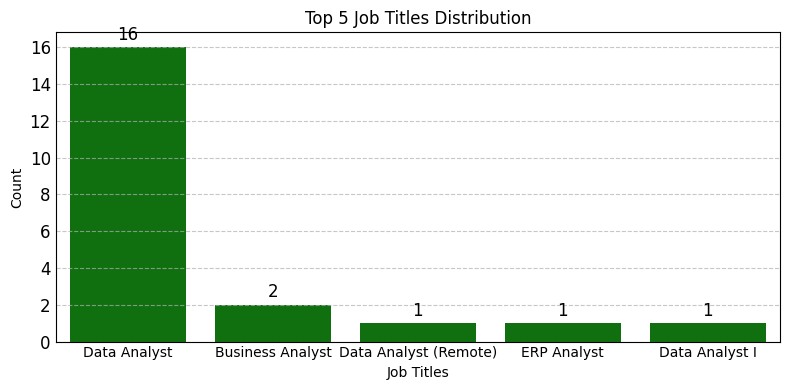

In [20]:
top_job_titles = glassdoor_data['job_title'].value_counts().head(5).reset_index()
top_job_titles.columns = ['job_title', 'count']

plt.figure(figsize=(8, 4))
ax = sns.barplot(x='job_title', y='count', data=top_job_titles, color='green')

plt.title('Top 5 Job Titles Distribution', fontsize=12)
plt.xlabel('Job Titles', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Customize tick parameters
# plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(axis='both', which='both', length=0) 

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=12)

plt.tight_layout()
plt.show()

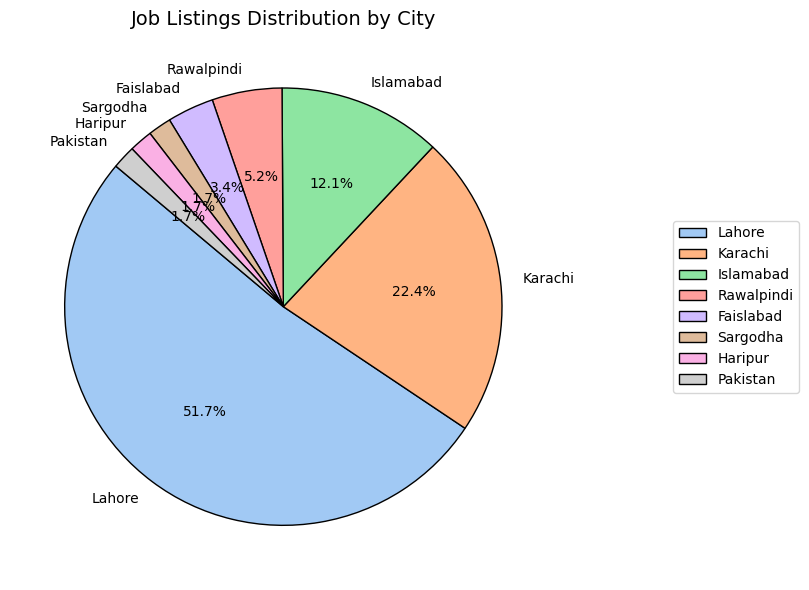

In [21]:
# Count occurrences of each city
city_counts = glassdoor_data['location'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Define colors using Seaborn's color palette
colors = sns.color_palette('pastel', len(city_counts))

# Plot the data
plt.figure(figsize=(10, 6))
plt.pie(city_counts['count'], labels=city_counts['city'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 10})

plt.title('Job Listings Distribution by City', fontsize=14)

# Add a legend outside the pie chart
plt.legend(city_counts['city'], loc="center left", bbox_to_anchor=(1.2, 0.5), fontsize=10)

plt.tight_layout()
plt.show()

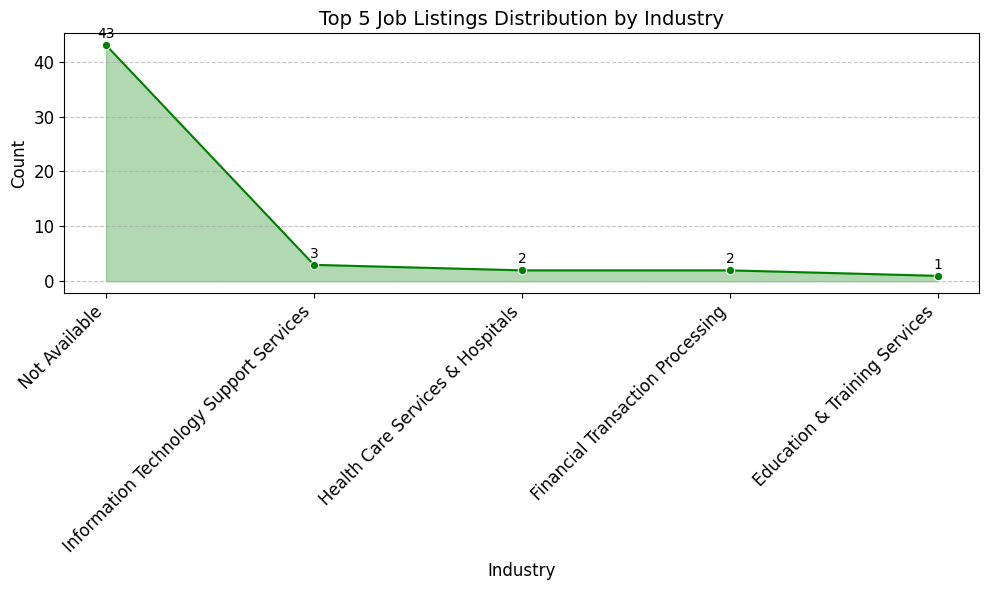

In [22]:
industry_counts = glassdoor_data['industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Count']

# Get the top 5 industries
top_5_industries = industry_counts.head(5)

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Industry', y='Count', data=top_5_industries, marker='o', color='green')

# Fill the area under the line plot with the same green color
plt.fill_between(top_5_industries['Industry'], top_5_industries['Count'], color='green', alpha=0.3)

# Add data labels
for i in range(len(top_5_industries)):
    plt.annotate(top_5_industries['Count'].iloc[i], 
                 (top_5_industries['Industry'].iloc[i], top_5_industries['Count'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center')

plt.title('Top 5 Job Listings Distribution by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize tick parameters
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_5888\2093095318.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sector', y='count', data=sector_counts, palette='viridis')


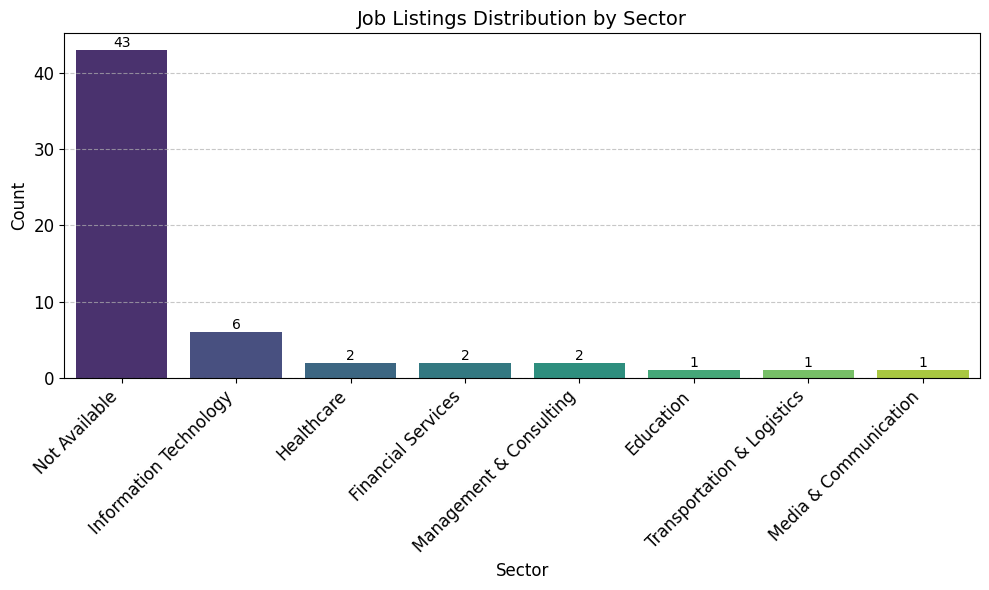

In [23]:
# Count occurrences of each sector
sector_counts = glassdoor_data['sector'].value_counts().reset_index()
sector_counts.columns = ['sector', 'count']

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='sector', y='count', data=sector_counts, palette='viridis')

# Add data labels
for index, value in enumerate(sector_counts['count']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Job Listings Distribution by Sector', fontsize=14)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize tick parameters
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5888\2262827717.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company Size', y='Count', data=company_size_counts, palette='viridis')


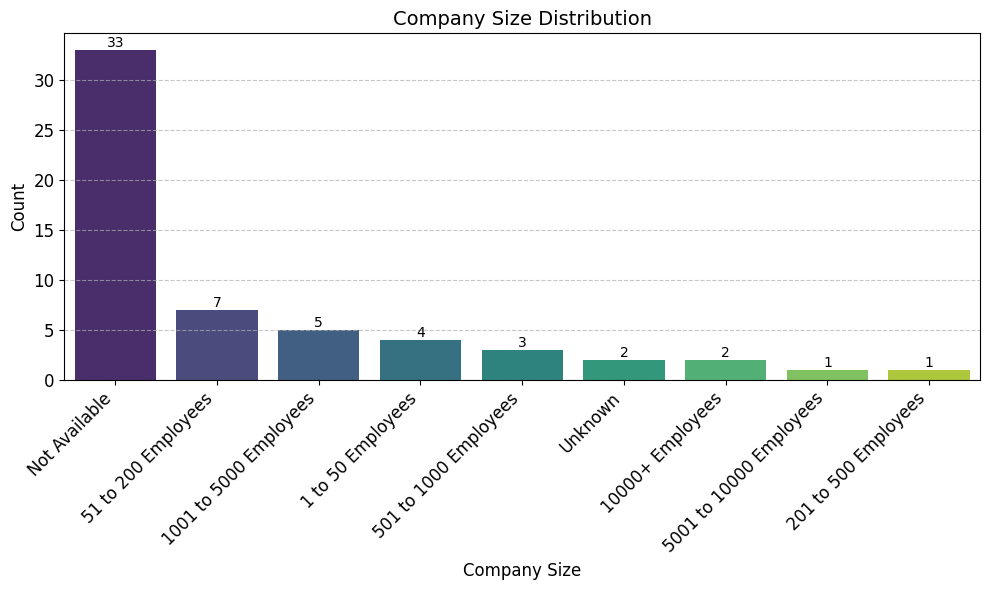

In [24]:
# Count occurrences of each company size
company_size_counts = glassdoor_data['size'].value_counts().reset_index()
company_size_counts.columns = ['Company Size', 'Count']

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Company Size', y='Count', data=company_size_counts, palette='viridis')

# Add data labels
for index, row in company_size_counts.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom', fontsize=10)

plt.title('Company Size Distribution', fontsize=14)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize tick parameters
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

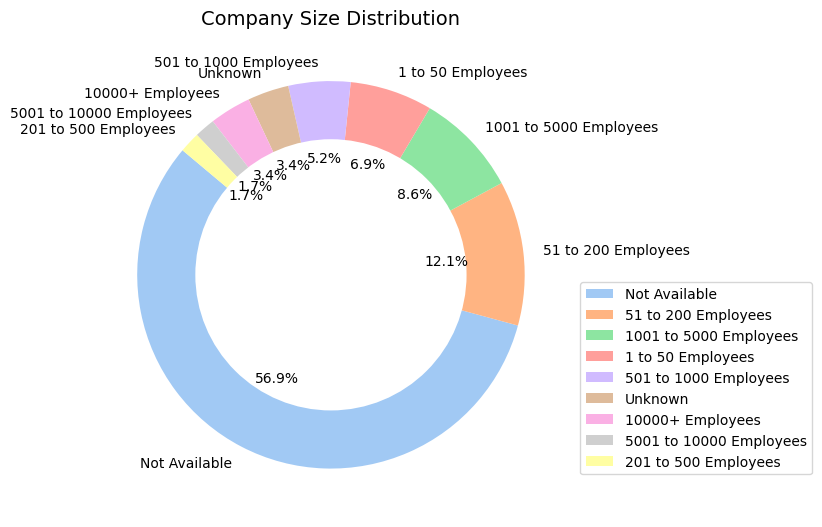

In [25]:
# Count occurrences of each company size
company_size_counts = glassdoor_data['size'].value_counts().reset_index()
company_size_counts.columns = ['Company Size', 'Count']

# Plot the data using Seaborn
plt.figure(figsize=(8, 8))
sns.set_palette('pastel')
plt.pie(company_size_counts['Count'], labels=company_size_counts['Company Size'], autopct='%1.1f%%', startangle=140)

# Add a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Company Size Distribution', fontsize=14)

# Add legend outside the pie chart
plt.legend(loc='upper left', labels=company_size_counts['Company Size'], bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5888\486712187.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_company_counts.index, y=top_5_company_counts.values, palette='viridis')


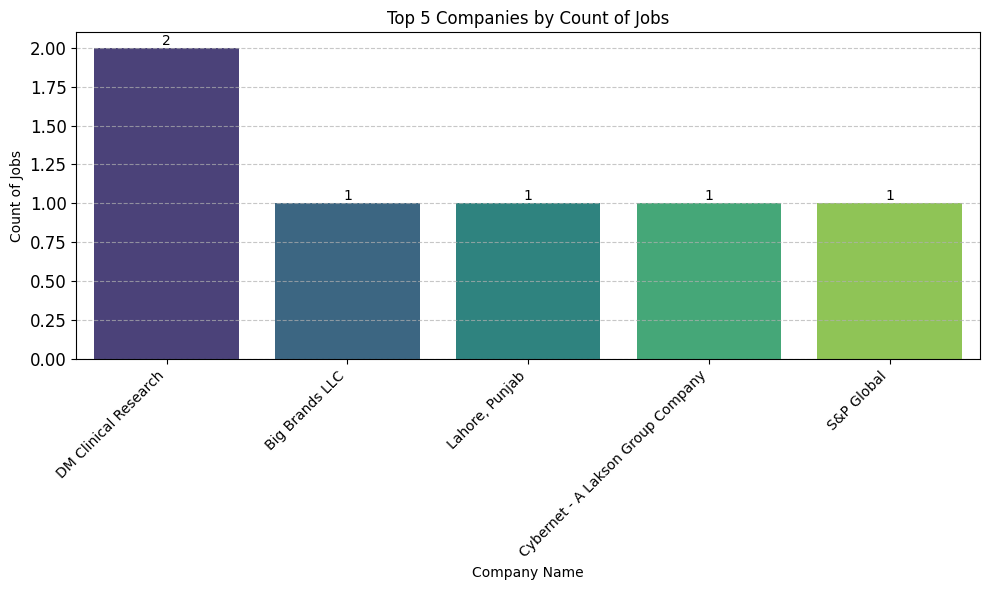

In [29]:
# Get the top 5 company names and their counts of jobs
top_5_company_counts = glassdoor_data['company_name'].value_counts().head(5)

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_company_counts.index, y=top_5_company_counts.values, palette='viridis')

# Add data labels
for index, value in enumerate(top_5_company_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Top 5 Companies by Count of Jobs', fontsize=12)
plt.xlabel('Company Name', fontsize=10)
plt.ylabel('Count of Jobs', fontsize=10)

# Customize tick parameters
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

LinkedIn EDA and Visualizations

In [30]:
linkedin_data = pd.read_excel('linkedin_jobs_data.xlsx')

In [31]:
linkedin_data.head()

,Job Title,Company Name,Location,Date,Seniority level,Employment type,Job function,Industries,Actual Date
0,Data Analysis & Reporting Specialist,TCL,Lahore,1 week ago,Associate,Full-time,Information Technology,Computers and Electronics Manufacturing,2024-05-25
1,Data Analyst I,DM Clinical Research,Karachi,2 days ago,Entry level,Contract,Information Technology,Internet Publishing,2024-05-30
2,Marketing Data Analyst,DM Clinical Research,Karachi,1 week ago,Entry level,Full-time,Information Technology,Internet Publishing,2024-05-25
3,Data Analyst,World Food Programme,Islamabad,4 weeks ago,Mid-Senior level,Contract,"Analyst, Project Management, and Quality Assur...","Non-profit Organizations, Data Infrastructure ...",2024-05-04
4,Assistant Manager - Data Analytics,foodpanda,Karachi,3 days ago,Entry level,Full-time,Information Technology,Internet Marketplace Platforms,2024-05-29


In [32]:
linkedin_data.rename(columns = {'Job Title':'job_title','Company Name':'company_name', 'Location':'location','Data':'data','Seniority level':'seniority_level', 'Employment type':'employment_type','Job function':'job_function','Industries':'industries','Actual Date': 'actual_date'}, inplace = True)

In [33]:
linkedin_data.head()

,job_title,company_name,location,Date,seniority_level,employment_type,job_function,industries,actual_date
0,Data Analysis & Reporting Specialist,TCL,Lahore,1 week ago,Associate,Full-time,Information Technology,Computers and Electronics Manufacturing,2024-05-25
1,Data Analyst I,DM Clinical Research,Karachi,2 days ago,Entry level,Contract,Information Technology,Internet Publishing,2024-05-30
2,Marketing Data Analyst,DM Clinical Research,Karachi,1 week ago,Entry level,Full-time,Information Technology,Internet Publishing,2024-05-25
3,Data Analyst,World Food Programme,Islamabad,4 weeks ago,Mid-Senior level,Contract,"Analyst, Project Management, and Quality Assur...","Non-profit Organizations, Data Infrastructure ...",2024-05-04
4,Assistant Manager - Data Analytics,foodpanda,Karachi,3 days ago,Entry level,Full-time,Information Technology,Internet Marketplace Platforms,2024-05-29


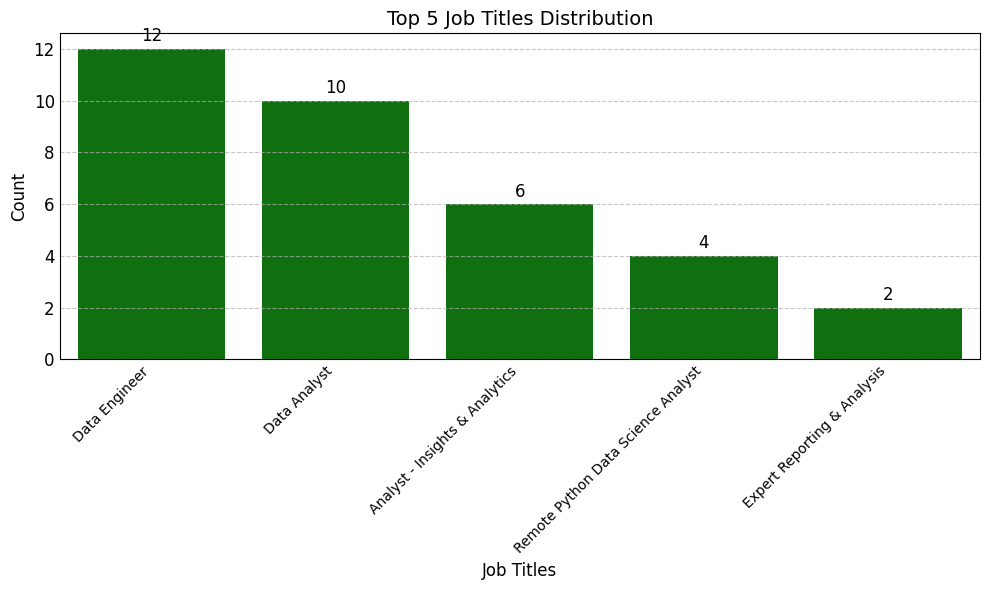

In [34]:
top_job_titles = linkedin_data['job_title'].value_counts().head(5).reset_index()
top_job_titles.columns = ['job_title', 'count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='job_title', y='count', data=top_job_titles, color='green')

plt.title('Top 5 Job Titles Distribution', fontsize=14)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize tick parameters
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tick_params(axis='both', which='both', length=0) 

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=12)

plt.tight_layout()
plt.show()

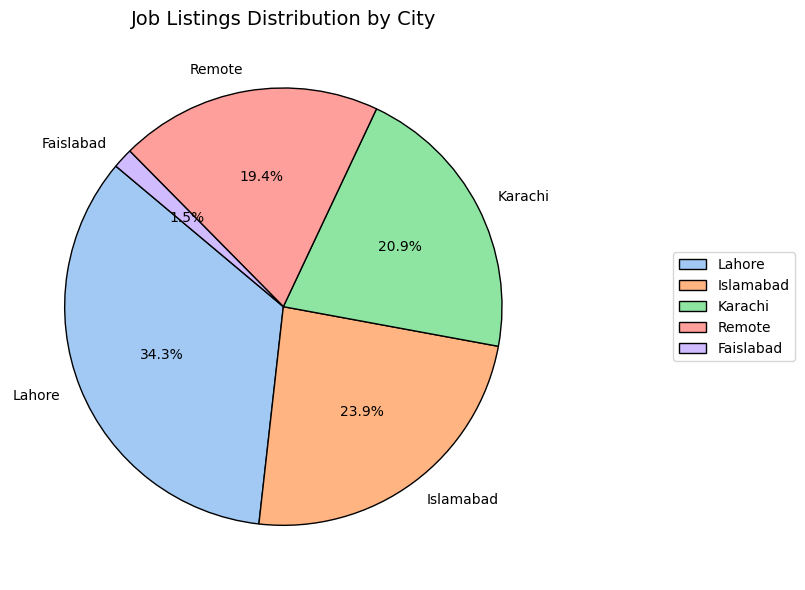

In [35]:
# Count occurrences of each city
city_counts = linkedin_data['location'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Define colors using Seaborn's color palette
colors = sns.color_palette('pastel', len(city_counts))

# Plot the data
plt.figure(figsize=(10, 6))
plt.pie(city_counts['count'], labels=city_counts['city'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 10})

plt.title('Job Listings Distribution by City', fontsize=14)

# Add a legend outside the pie chart
plt.legend(city_counts['city'], loc="center left", bbox_to_anchor=(1.2, 0.5), fontsize=10)

plt.tight_layout()
plt.show()

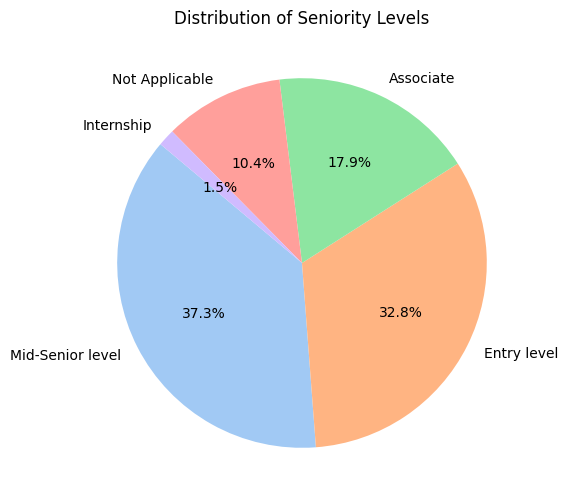

In [36]:
seniority_counts = linkedin_data['seniority_level'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(seniority_counts, labels=seniority_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Seniority Levels')
plt.show()

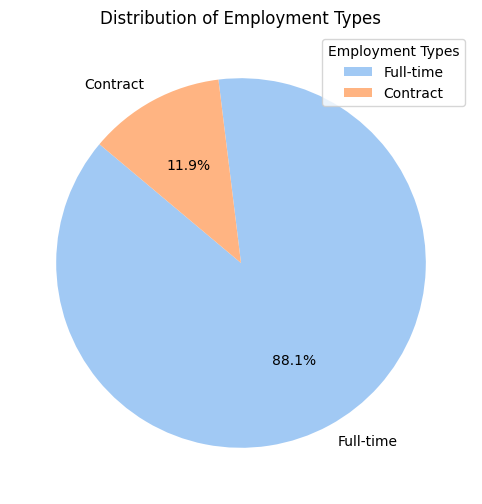

In [37]:
# Plotting for Employment Type
employment_type_counts = linkedin_data['employment_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employment Types')
plt.legend(employment_type_counts.index, title="Employment Types", loc="best")
plt.show()